# **Support Vector Machine**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('root2ai.csv')

In [3]:
df.shape

(22704, 2)

In [4]:
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [6]:
df['Text'].isnull().sum()

3

In [7]:
df['Target'].isnull().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df['Target'].isnull().sum()

0

In [10]:
# making all as lower case

df['Text'] = df['Text'].apply(lambda x: x.lower())

In [11]:
# Stop words from spacy library

from spacy.lang.en.stop_words import STOP_WORDS
# print(STOP_WORDS)

In [12]:
# I am using the spacy library because it is more advanced and have more stopwords compared to nltk

df['Text'] = df['Text'].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
# Limmetization

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i[0], get_wordnet_pos(i[1])) for i in nltk.pos_tag(x.split())]))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 10000)

tfidf_vectors = vec.fit_transform(df['Text'])

In [18]:
new_df = pd.DataFrame(tfidf_vectors.toarray(), columns = vec.get_feature_names())
new_df.head()

,abaker,abandon,abandonment,abash,abbeel,abcs,abductive,abdullah,abhijit,abid,...,zhou,zine,zing,zip,zmlg,zone,zoom,zrev,zurich,zxnglqu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [20]:
df['Target'].isnull().sum()

0

Sice the target or output has categorical data we can't pass it to the model so mapping that to number

Since it the target column and giving 1, 2, 3, 4 ......it's weight won't effect the model

In [21]:
dict_map = {'FinTech':0, 'Cyber Security':1, 'Bigdata':2, 'Reg Tech':3, "credit reporting": 4,
            'Blockchain':5, "Neobanks":6, "Microservices":7, 'Stock Trading':8, "Robo Advising":9, 'Data Security':10}

In [22]:
df['Target'] = df['Target'].map(dict_map)

In [23]:
df['Target'].isnull().sum()

0

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['Target'], test_size = 0.2)

In [25]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y_train.isnull().sum()

0

# Logestic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 200)
log_model = log.fit(X_train.toarray(), y_train)

In [44]:
y_pred = log_model.predict(X_test.toarray())

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.6324598106144022


# KNN Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # n_n_neighbors is the k value
knn_model = knn.fit(X_train.toarray(), y_train)

#First we take k value 1 then we check the model then in the below we can understand how to select k value

In [30]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.3144681788152389


In [31]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

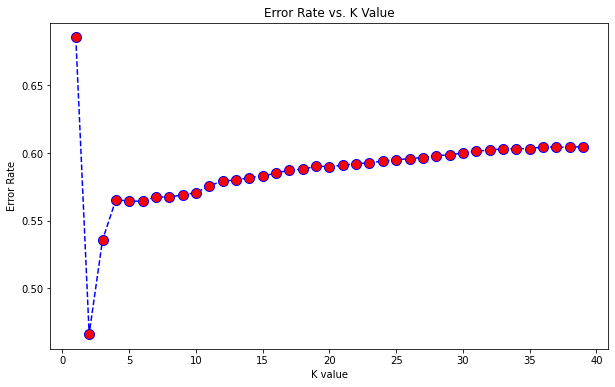

In [32]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

As we can see in the graph at k value 2 the error rate is less and it is stable to some extinct so we can select k value as 23

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) # n_n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

In [40]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.5340233428760185


# Navie Bayes Model (Gaussian NB)

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)

GaussianNB()

In [36]:
y_pred = nb_model.predict(X_test.toarray())

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.36930191587756


# Navie Bayes Model (Multinomial NB)

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb_model1 = MultinomialNB()
nb_model1.fit(X_train.toarray(), y_train)

MultinomialNB()

In [38]:
y_pred_m = nb_model1.predict(X_test.toarray())

from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred_m, y_test)
print(score1)

0.5029729134551861


# SVM

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
svm_model = classifier.fit(X_train.toarray(), y_train)

In [45]:
y_pred = svm_model.predict(X_test.toarray())

from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred, y_test)
print(score1)

0.6408280114512221
